In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os

import numpy as np
from models import *

import torch
import torch.optim

from skimage.metrics import peak_signal_noise_ratio
from utils.denoising_utils import *

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True

use_gpu = True

if use_gpu:
    dtype = torch.cuda.FloatTensor
else:
    dtype = torch.float32

print(f'GPU: {use_gpu}')

imsize =-1
PLOT = True

# Parameters of the Noise
sigma = 25
sigma_ = sigma/255.

GPU: True


In [2]:
## denoising
fname = 'data/denoising/F16_GT.png'

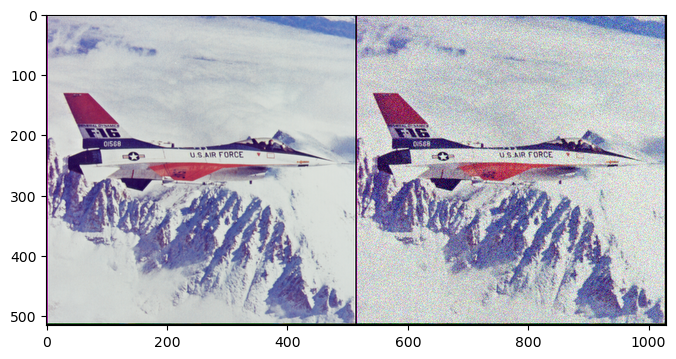

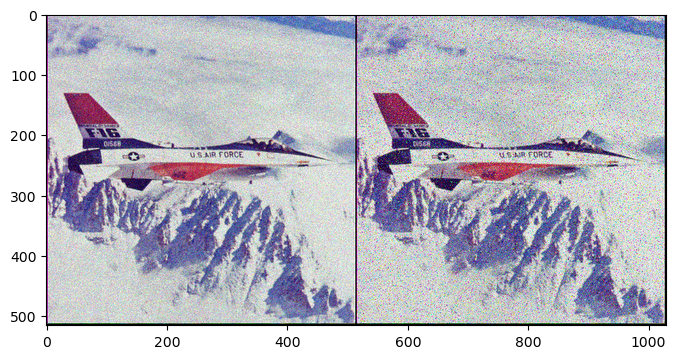

In [9]:
def get_possion_image(img_np, lam):

    img_noisy_np = np.clip(img_np + np.random.poisson(lam=0.3, size=img_np.shape), 0, 1).astype(np.float32)
    img_noisy_pil = np_to_pil(img_noisy_np)

    return img_noisy_pil, img_noisy_np

# Add synthetic noise(Gaussin)
img_pil = crop_image(get_image(fname, imsize)[0], d=32)
img_np = pil_to_np(img_pil)

img_poisson_pil, img_poisson_np = get_noisy_image(img_np, sigma_)

if PLOT:
    plot_image_grid([img_np, img_poisson_np], 4, 6)

def get_noisy_image_salt_pepper(img_np, prob):

    img_noisy_np = np.copy(img_np)
    salt_pepper_mask = np.random.choice([0, 1, 2], size=img_np.shape, p=[prob / 2, prob / 2, 1 - prob])
    img_noisy_np[salt_pepper_mask == 0] = 0
    img_noisy_np[salt_pepper_mask == 1] = 1

    img_noisy_pil = np_to_pil(img_noisy_np)
    return img_noisy_pil, img_noisy_np

prob = 0.05
img_pil = crop_image(get_image(fname, imsize)[0], d=32)
img_np = pil_to_np(img_poisson_pil)

img_salt_pil, img_salt_np = get_noisy_image_salt_pepper(img_np, prob)

if PLOT:
    plot_image_grid([img_np, img_salt_np], 4, 6)

In [10]:
# define the ResNet model

INPUT = 'noise' # 'meshgrid'
pad = 'reflection'
OPT_OVER = 'net' # 'net,input'

#training parameters
reg_noise_std = 1./30.
LR = 0.01

OPTIMIZER='adam' # 'LBFGS'
show_every = 100
exp_weight=0.99

num_iter = 500
input_depth = 3
figsize = 4
random_noise = False

#Network structure
net = get_net(input_depth, 'ResNet', pad, upsample_mode='bilinear').type(dtype)

# whether to generate random noise or noisy image
if random_noise:
    net_input = get_noise(input_depth, INPUT, (img_pil.size[1], img_pil.size[0])).type(dtype).detach()
else:
    net_input = np_to_torch(img_salt_np).type(dtype)

# Compute number of parameters
s  = sum([np.prod(list(p.size())) for p in net.parameters()]);
print ('Number of params: %d' % s)

# Loss
mse = torch.nn.MSELoss().type(dtype)

img_noisy_torch = np_to_torch(img_salt_np).type(dtype)
img_torch = np_to_torch(img_np).type(dtype)

LeakyReLU
<class 'str'>
LeakyReLU
<class 'str'>
LeakyReLU
<class 'str'>
LeakyReLU
<class 'str'>
LeakyReLU
<class 'str'>
LeakyReLU
<class 'str'>
LeakyReLU
<class 'str'>
LeakyReLU
<class 'str'>
LeakyReLU
<class 'str'>
LeakyReLU
<class 'str'>
LeakyReLU
<class 'str'>
Number of params: 49955


Starting optimization with ADAM
Iteration:  0  Loss:  0.00508133415132761  PSRN_gt:  22.940222508513873  PSNR_gt_sm:  17.604103076102636


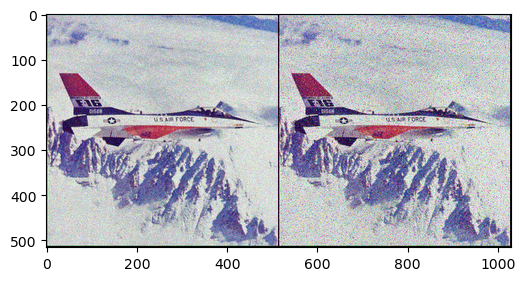

Iteration:  10  Loss:  0.011664118617773056  PSRN_gt:  19.331480490966758  PSNR_gt_sm:  18.3516367948538
Iteration:  20  Loss:  0.00904689822345972  PSRN_gt:  20.435003141975212  PSNR_gt_sm:  19.016236782661686
Iteration:  30  Loss:  0.007739649154245853  PSRN_gt:  21.112787532534657  PSNR_gt_sm:  19.560800922409502
Iteration:  40  Loss:  0.006969244685024023  PSRN_gt:  21.568143184869907  PSNR_gt_sm:  20.03127992519177
Iteration:  50  Loss:  0.006254734471440315  PSRN_gt:  22.03791142649067  PSNR_gt_sm:  20.448618617770865
Iteration:  60  Loss:  0.006403394043445587  PSRN_gt:  21.935897682536286  PSNR_gt_sm:  20.817585699973556
Iteration:  70  Loss:  0.005636814050376415  PSRN_gt:  22.489662969269062  PSNR_gt_sm:  21.14523939909821
Iteration:  80  Loss:  0.0051409173756837845  PSRN_gt:  22.889593608174312  PSNR_gt_sm:  21.43826549625232
Iteration:  90  Loss:  0.004876377061009407  PSRN_gt:  23.119027250869433  PSNR_gt_sm:  21.716259428862074
Iteration:  100  Loss:  0.00467759929597377

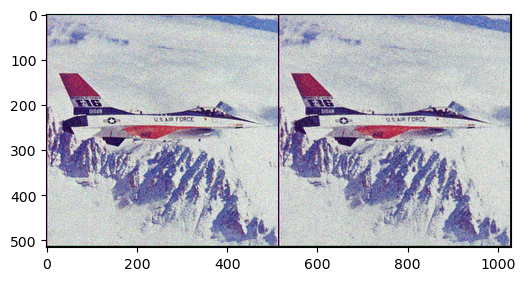

Iteration:  110  Loss:  0.004487154074013233  PSRN_gt:  23.480290607110106  PSNR_gt_sm:  22.236552738380098
Iteration:  120  Loss:  0.004286277573555708  PSRN_gt:  23.679197211301886  PSNR_gt_sm:  22.488347698376995
Iteration:  130  Loss:  0.004220807924866676  PSRN_gt:  23.746044044032473  PSNR_gt_sm:  22.73987605679843
Iteration:  140  Loss:  0.004094376694411039  PSRN_gt:  23.878122468820955  PSNR_gt_sm:  22.98770433457705
Iteration:  150  Loss:  0.003846192266792059  PSRN_gt:  24.149690360244737  PSNR_gt_sm:  23.231421410114873
Iteration:  160  Loss:  0.003734240308403969  PSRN_gt:  24.277977261417636  PSNR_gt_sm:  23.46760798406315
Iteration:  170  Loss:  0.0037114087026566267  PSRN_gt:  24.304612454753254  PSNR_gt_sm:  23.69072829223953
Iteration:  180  Loss:  0.0036681795027107  PSRN_gt:  24.355494287285907  PSNR_gt_sm:  23.895903335786976
Iteration:  190  Loss:  0.0035560340620577335  PSRN_gt:  24.490341227625215  PSNR_gt_sm:  24.086069375369895
Iteration:  200  Loss:  0.003496

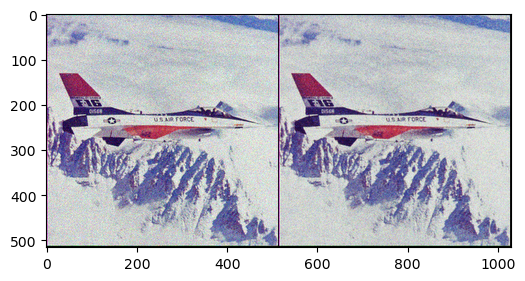

Iteration:  210  Loss:  0.0034355109091848135  PSRN_gt:  24.64008677448893  PSNR_gt_sm:  24.425654961758283
Iteration:  220  Loss:  0.003483382984995842  PSRN_gt:  24.57998798813776  PSNR_gt_sm:  24.57421288260379
Iteration:  230  Loss:  0.0034368818160146475  PSRN_gt:  24.638354186611068  PSNR_gt_sm:  24.7121038180238
Iteration:  240  Loss:  0.003346014767885208  PSRN_gt:  24.75472173691557  PSNR_gt_sm:  24.839816729330515
Iteration:  250  Loss:  0.003289277432486415  PSRN_gt:  24.828994816068203  PSNR_gt_sm:  24.960692279816122
Iteration:  260  Loss:  0.0033166471403092146  PSRN_gt:  24.793007287856526  PSNR_gt_sm:  25.073801504042596
Iteration:  270  Loss:  0.003225324209779501  PSRN_gt:  24.914266325564952  PSNR_gt_sm:  25.178822787591816
Iteration:  280  Loss:  0.0032427245751023293  PSRN_gt:  24.890899294674394  PSNR_gt_sm:  25.275789913921088
Iteration:  290  Loss:  0.0031854796689003706  PSRN_gt:  24.968251880462184  PSNR_gt_sm:  25.36420540356879
Iteration:  300  Loss:  0.0031

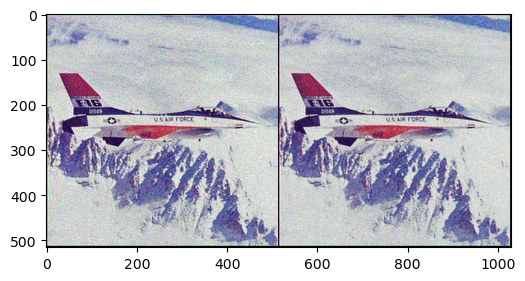

Iteration:  310  Loss:  0.003137908410280943  PSRN_gt:  25.033597233431813  PSNR_gt_sm:  25.519971952373606
Iteration:  320  Loss:  0.003195042721927166  PSRN_gt:  24.955233235848166  PSNR_gt_sm:  25.58516532276716
Iteration:  330  Loss:  0.003237663535401225  PSRN_gt:  24.897683008417243  PSNR_gt_sm:  25.64154721482543
Iteration:  340  Loss:  0.003574702423065901  PSRN_gt:  24.46760115816125  PSNR_gt_sm:  25.685459813737474
Iteration:  350  Loss:  0.0034918468445539474  PSRN_gt:  24.569448303970894  PSNR_gt_sm:  25.71900278776053
Iteration:  360  Loss:  0.0032308893278241158  PSRN_gt:  24.90677931445894  PSNR_gt_sm:  25.7521307218843
Iteration:  370  Loss:  0.0031398660503327847  PSRN_gt:  25.030888738330678  PSNR_gt_sm:  25.787887428750476
Iteration:  380  Loss:  0.0030929087661206722  PSRN_gt:  25.09632920443281  PSNR_gt_sm:  25.823933889845367
Iteration:  390  Loss:  0.0030765049159526825  PSRN_gt:  25.119423849406882  PSNR_gt_sm:  25.858104931307857
Iteration:  400  Loss:  0.00306

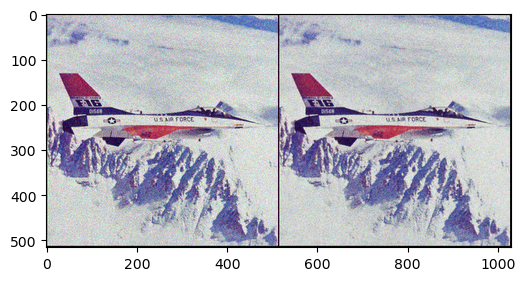

Iteration:  410  Loss:  0.003046117490157485  PSRN_gt:  25.162533498685956  PSNR_gt_sm:  25.921569067518412
Iteration:  420  Loss:  0.0030469647608697414  PSRN_gt:  25.16132608006153  PSNR_gt_sm:  25.949516362095913
Iteration:  430  Loss:  0.0030430941842496395  PSRN_gt:  25.16684667934733  PSNR_gt_sm:  25.975210922606507
Iteration:  440  Loss:  0.0030363518744707108  PSRN_gt:  25.176479308960506  PSNR_gt_sm:  25.998976800547574
Iteration:  450  Loss:  0.003027515020221472  PSRN_gt:  25.189137205680332  PSNR_gt_sm:  26.02111183326967
Iteration:  460  Loss:  0.0030412408523261547  PSRN_gt:  25.169491911312704  PSNR_gt_sm:  26.04147349430281
Iteration:  470  Loss:  0.0030186015646904707  PSRN_gt:  25.201941656768476  PSNR_gt_sm:  26.059890614542237
Iteration:  480  Loss:  0.003040472511202097  PSRN_gt:  25.17058943751994  PSNR_gt_sm:  26.076957367811993
Iteration:  490  Loss:  0.0030137058347463608  PSRN_gt:  25.208991407838038  PSNR_gt_sm:  26.09317545658498


In [13]:
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()
#smoothing image
out_avg = net_input_saved

#without smoothing
#out_avg = None

last_net = None
psrn_noisy_last = 0

i = 0
def closure():

    global i, out_avg, psrn_noisy_last, last_net, net_input

    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std)

    out = net(net_input)

    # Smoothing
    if out_avg is None:
        out_avg = out.detach()
    else:
        out_avg = out_avg * exp_weight + out.detach() * (1 - exp_weight)

    #total_loss = mse(out, img_noisy_torch)
    total_loss = mse(out, img_torch)
    total_loss.backward()

    #evaluation with psrn
    psrn_noisy = peak_signal_noise_ratio(img_salt_np, out.detach().cpu().numpy()[0])   # the noise image
    psrn_gt    = peak_signal_noise_ratio(img_np, out.detach().cpu().numpy()[0])
    psrn_gt_sm = peak_signal_noise_ratio(img_np, out_avg.detach().cpu().numpy()[0])

    if  PLOT and i % 10 == 0:
        print ('Iteration: ', i, ' Loss: ', total_loss.item(), ' PSRN_gt: ', psrn_gt, ' PSNR_gt_sm: ', psrn_gt_sm)
    #print ('Iteration %05d    Loss %f   PSRN_gt: %f PSNR_gt_sm: %f' % (i, total_loss.item(), psrn_gt, psrn_gt_sm), '\r', end='')
    if  PLOT and i % show_every == 0:
        #out_np = torch_to_np(out)
        plot_image_grid([np.clip(img_np, 0, 1),
                         np.clip(torch_to_np(out_avg), 0, 1)], factor=figsize, nrow=2)



    # Backtracking
    if i % show_every:
        if psrn_noisy - psrn_noisy_last < -5:
            print('Falling back to previous checkpoint.')

            for new_param, net_param in zip(last_net, net.parameters()):
                net_param.data.copy_(new_param.cuda())

            return total_loss*0
        else:
            last_net = [x.detach().cpu() for x in net.parameters()]
            psrn_noisy_last = psrn_noisy

    i += 1

    return total_loss

p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, closure, LR, num_iter)

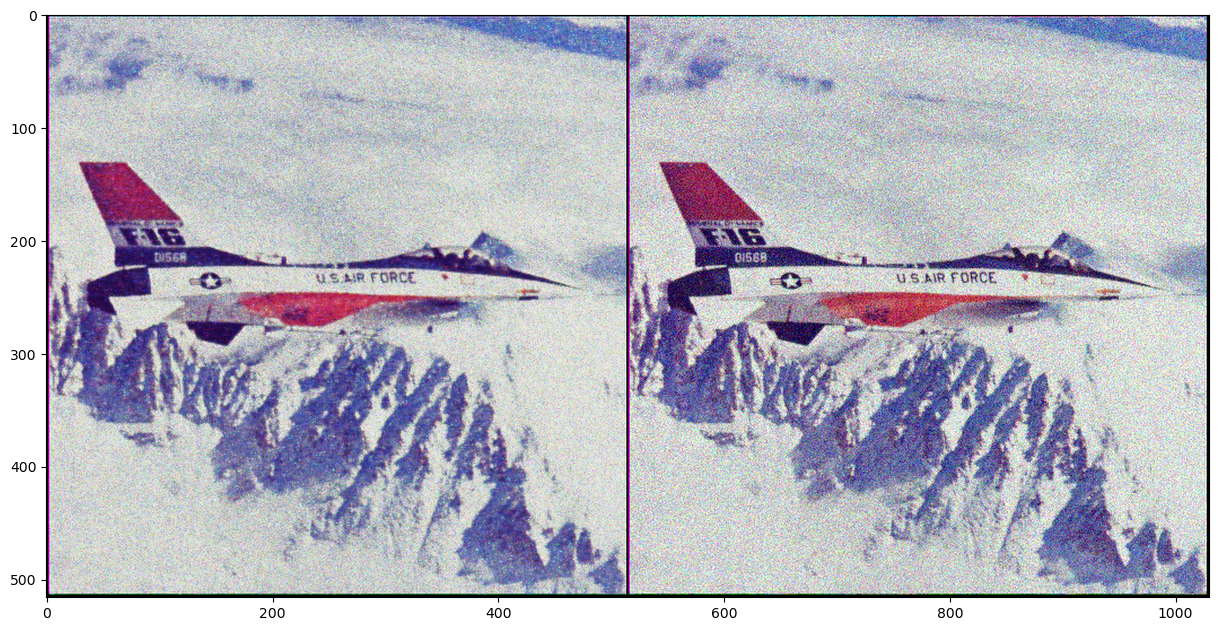

In [12]:
out_np = torch_to_np(net(net_input))
q = plot_image_grid([np.clip(out_np, 0, 1), img_np], factor=13);